## Average pass length

In [1]:
# Imports 
import csv
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#import all the seasons
damallsvenskan = pd.read_csv('csv/damallsvenskan_all.csv')
allsvenskan = pd.read_csv('csv/allsvenskan_all.csv')

In [3]:
#Get the average length of a pass

total_pass_length_damallsvenskan = damallsvenskan[damallsvenskan['action'] == 'Pass accurate']
totalpasses = 0
pass_length_tot = 0
for index, row in total_pass_length_damallsvenskan.iterrows():
  pass_length_tot += ((row["xpos"] - row["xdest"])**2 + (row["ypos"] - row["ydest"])**2)**0.5
  totalpasses += 1

print(totalpasses)
print(pass_length_tot)
print("Average " , pass_length_tot / totalpasses)

498218
11251448.614551177
Average  22.58338441114367


In [4]:
#Get the average length of a pass

total_pass_length_allsvenskan = allsvenskan[allsvenskan['action'] == 'Pass accurate']
totalpasses = 0
pass_length_tot = 0
for index, row in total_pass_length_allsvenskan.iterrows():
  pass_length_tot += ((row["xpos"] - row["xdest"])**2 + (row["ypos"] - row["ydest"])**2)**0.5
  totalpasses += 1

print(totalpasses)
print(pass_length_tot)
print("Average " , pass_length_tot / totalpasses)


972220
22924705.88712539
Average  23.57975138047499


# Pass Flow motifs - Damallsvenskan

In [5]:
# Five possible flow motifs involving 3 passes:
# ABAB ABAC ABCA ABCB ABCD

successful_passes = 0
playerlist = []
total_pass_flow_motives = 0
Abab = 0
Abac = 0
Abca = 0
Abcb = 0
Abcd = 0
for index, row in damallsvenskan.iterrows():
  if row["action"] == "Pass accurate":
    if successful_passes == 0:
      playerlist.append(row["player"])
      playerlist.append(row["next_player"])
    else:
      playerlist.append(row["next_player"])
    successful_passes += 1
  else:
    successful_passes = 0
    playerlist = []
  if successful_passes >= 3:
    total_pass_flow_motives += 1
    if playerlist[2] == playerlist[0] and playerlist[1] == playerlist[3]:
      Abab += 1
    elif playerlist[0] == playerlist[2] and playerlist[1] != playerlist[3]:
      Abac += 1 
    elif playerlist[0] == playerlist[3]:
      Abca += 1
    elif playerlist[1] == playerlist[3]:
      Abcb += 1
    else:
      Abcd += 1
    playerlist.pop()

print ("Total pass flow motives: " , total_pass_flow_motives)
print("Abab: " , Abab)
print("Abac: " , Abac)
print("Abca: " , Abca)
print("Abcb: " , Abcb)
print("Abcd: " , Abcd)  
print("Procentages: " )


Total pass flow motives:  165187
Abab:  3905
Abac:  26637
Abca:  11777
Abcb:  15456
Abcd:  107412
Procentages: 



  Pass flow motive       ABAB      ABAC      ABCA       ABCB      ABCD
------------------  ---------  --------  --------  ---------  --------
Amount of passes    3905       26637     11777     15456      107412
% of passes         0.0236399  0.161254  0.071295  0.0935667  0.650245


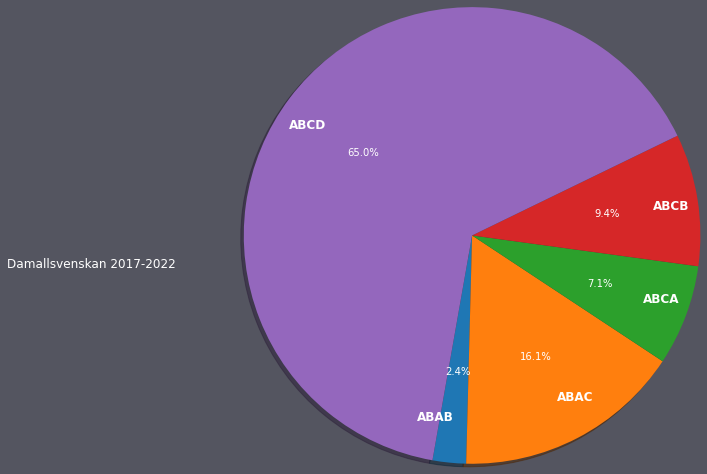

In [6]:
#plot the data
from tabulate import tabulate
print()
table = [['Pass flow motive','ABAB', 'ABAC', 'ABCA', 'ABCB', 'ABCD'], ['Amount of passes', Abab,Abac,Abca,Abcb,Abcd], ["% of passes" ,Abab/total_pass_flow_motives,Abac/total_pass_flow_motives,Abca/total_pass_flow_motives,Abcb/total_pass_flow_motives,Abcd/total_pass_flow_motives]]
print(tabulate(table, headers='firstrow', tablefmt='simple_grid', colalign='center'))
values = [Abab,Abac,Abca,Abcb,Abcd]
y = np.array([Abab/total_pass_flow_motives,Abac/total_pass_flow_motives,Abca/total_pass_flow_motives,Abcb/total_pass_flow_motives,Abcd/total_pass_flow_motives])
mylabels = ["ABAB", "ABAC", "ABCA", "ABCB", "ABCD"]

fig, ax = plt.subplots(facecolor='#545560', figsize = (7,7)) 
plt.title("Damallsvenskan 2017-2022", x = -0.5 , y = 0.4,color = 'white' , fontweight = '15')
_, texts , autopcts =plt.pie(values, labels = mylabels, startangle = 260, autopct='%1.1f%%', pctdistance=0.6, labeldistance=0.8, radius=1.5, shadow=True)
plt.setp(texts, **{'color':'white', 'weight':'bold', 'fontsize':12})
plt.setp(autopcts, **{'color':'white',  'fontsize':10})
plt.show() 


## Pass flow motive - Herrallsvenskan

In [7]:
# Five possible flow motifs involving 3 passes:
# ABAB ABAC ABCA ABCB ABCD

successful_passes = 0
playerlist = []
total_pass_flow_motives = 0
Abab = 0
Abac = 0
Abca = 0
Abcb = 0
Abcd = 0
for index, row in allsvenskan.iterrows():
  if row["action"] == "Pass accurate":
    if successful_passes == 0:
      playerlist.append(row["player"])
      playerlist.append(row["next_player"])
    else:
      playerlist.append(row["next_player"])
    successful_passes += 1
  else:
    successful_passes = 0
    playerlist = []
  if successful_passes >= 3:
    total_pass_flow_motives += 1
    if playerlist[2] == playerlist[0] and playerlist[1] == playerlist[3]:
      Abab += 1
    elif playerlist[0] == playerlist[2] and playerlist[1] != playerlist[3]:
      Abac += 1 
    elif playerlist[0] == playerlist[3]:
      Abca += 1
    elif playerlist[1] == playerlist[3]:
      Abcb += 1
    else:
      Abcd += 1
    playerlist.pop()

print ("Total pass flow motives: " , total_pass_flow_motives)
print("Abab: " , Abab)
print("Abac: " , Abac)
print("Abca: " , Abca)
print("Abcb: " , Abcb)
print("Abcd: " , Abcd)  
print("Procentages: " )

Total pass flow motives:  425042
Abab:  9616
Abac:  69792
Abca:  30483
Abcb:  40656
Abcd:  274495
Procentages: 



  Pass flow motive       ABAB    ABAC       ABCA       ABCB      ABCD
------------------  ---------  ------  ---------  ---------  --------
Amount of passes    9616       69792   30483      40656      274495
% of passes         0.0226236  0.1642  0.0717176  0.0956517  0.645807


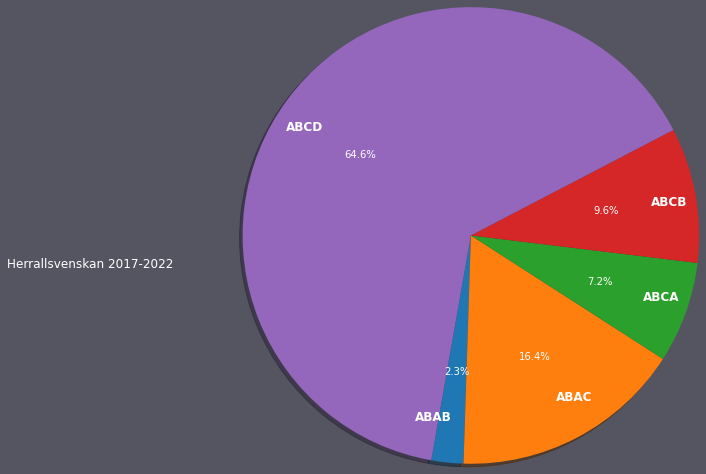

In [8]:
#plot the data
from tabulate import tabulate
print()
table = [['Pass flow motive','ABAB', 'ABAC', 'ABCA', 'ABCB', 'ABCD'], ['Amount of passes', Abab,Abac,Abca,Abcb,Abcd], ["% of passes" ,Abab/total_pass_flow_motives,Abac/total_pass_flow_motives,Abca/total_pass_flow_motives,Abcb/total_pass_flow_motives,Abcd/total_pass_flow_motives]]
print(tabulate(table, headers='firstrow', tablefmt='simple_grid', colalign='center'))
values = [Abab,Abac,Abca,Abcb,Abcd]
y = np.array([Abab/total_pass_flow_motives,Abac/total_pass_flow_motives,Abca/total_pass_flow_motives,Abcb/total_pass_flow_motives,Abcd/total_pass_flow_motives])
mylabels = ["ABAB", "ABAC", "ABCA", "ABCB", "ABCD"]

fig, ax = plt.subplots(facecolor='#545560', figsize = (7,7)) 
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title("Herrallsvenskan 2017-2022", x = -0.5 , y = 0.4,color = 'white' , fontweight = '15')
_, texts , autopcts =plt.pie(values, labels = mylabels, startangle = 260, autopct='%1.1f%%', pctdistance=0.6, labeldistance=0.8, radius=1.5, shadow=True)
plt.setp(texts, **{'color':'white', 'weight':'bold', 'fontsize':12})
plt.setp(autopcts, **{'color':'white',  'fontsize':10})
plt.show() 

## Average time of possession - Damallsvenskan

In [9]:
possesions = []
start_time = 0
current_team = 0
for index, row in damallsvenskan.iterrows():
    if current_team == 0:
        current_team = row["team"]
    else:
        if current_team != row["team"] and (row["action"] == "Pass accurate"):
            time_of_possession = row["start_time"] - start_time
            if time_of_possession > 0:
                possesions.append(time_of_possession)
            current_team = row["team"]
            start_time = row["start_time"]


print(sum(possesions) / len(possesions))

35.62470645657399


## Average time of possession - Herrallsvensakn


In [10]:
possesions = []
start_time = 0
current_team = 0
for index, row in allsvenskan.iterrows():
    if current_team == 0:
        current_team = row["team"]
    else:
        if current_team != row["team"] and (row["action"] == "Pass accurate"):
            time_of_possession = row["start_time"] - start_time
            if time_of_possession > 0:
                possesions.append(time_of_possession)
            current_team = row["team"]
            start_time = row["start_time"]


print(sum(possesions) / len(possesions))

42.357844694916416


## Percentage of throw ins retained - Damallsvenskan

In [11]:
nr_of_throwins = 0
ball_retention = 0
for index, row in damallsvenskan.iterrows():
    if row["throw_in"] == True:
        nr_of_throwins += 1
        next_action = damallsvenskan.iloc[index + 1]
        second_action = damallsvenskan.iloc[index + 2]
        third_action = damallsvenskan.iloc[index + 3]
        team = row["team"]
        if ((next_action["team"] == team ) & (second_action["team"] == team ) &  (third_action["team"] == team)):
                    ball_retention += 1
print("Nr of throw ins ", nr_of_throwins)
print("% ball retention ", ball_retention/nr_of_throwins)
dam_retention = ball_retention / nr_of_throwins


Nr of throw ins  46147
% ball retention  0.46280364920796585


## Percentage of throw ins retained - Herrallsvenskan

In [12]:
nr_of_throwins = 0
ball_retention = 0

for index, row in allsvenskan.iterrows():
    if row["throw_in"] == True:
        nr_of_throwins += 1
        next_action = allsvenskan.iloc[index + 1]
        second_action = allsvenskan.iloc[index + 2]
        third_action = allsvenskan.iloc[index + 3]
        team = row["team"]
        if ((next_action["team"] == team ) & (second_action["team"] == team ) &  (third_action["team"] == team)):
                    ball_retention += 1
print("Nr of throw ins ", nr_of_throwins)
print("% ball retention ", ball_retention/nr_of_throwins)

herr_retentions = ball_retention / nr_of_throwins

Nr of throw ins  55590
% ball retention  0.5615938118366612


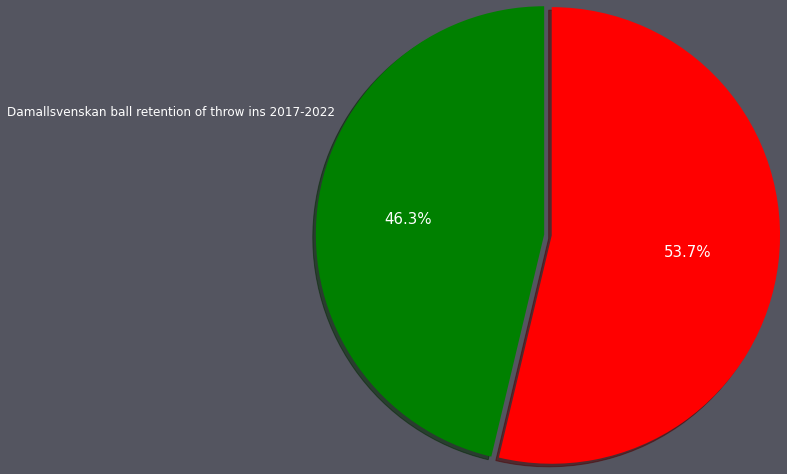

In [13]:
#plot the data

fig, ax = plt.subplots(facecolor='#545560', figsize = (7,7)) 
values = [dam_retention, 1 - dam_retention]
plt.title("Damallsvenskan ball retention of throw ins 2017-2022", x = -0.5 , y = 0.8,color = 'white' , fontweight = '30')
_, texts , autopcts =plt.pie(values, startangle = 90, autopct='%1.1f%%', pctdistance=0.6, labeldistance=0.8, radius=1.5, shadow=True, explode=[0.05,0], colors=['g', 'r'])
plt.setp(texts, **{'color':'white', 'weight':'bold', 'fontsize':12})
plt.setp(autopcts, **{'color':'white',  'fontsize':15})
plt.show() 

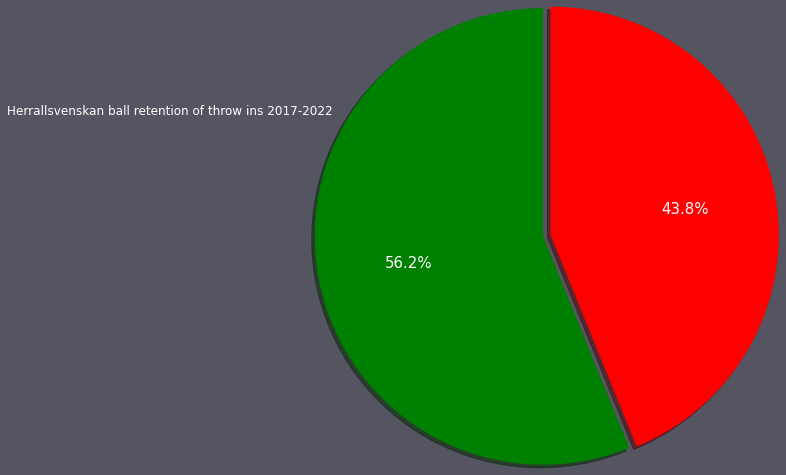

In [14]:
fig, ax = plt.subplots(facecolor='#545560', figsize = (7,7)) 
values = [herr_retentions, 1 - herr_retentions]
plt.title("Herrallsvenskan ball retention of throw ins 2017-2022", x = -0.5 , y = 0.8,color = 'white' , fontweight = '30')
_, texts , autopcts =plt.pie(values, startangle = 90, autopct='%1.1f%%', pctdistance=0.6, labeldistance=0.8, radius=1.5, shadow=True, explode=[0.05,0], colors=['g', 'r'])
plt.setp(texts, **{'color':'white', 'weight':'bold', 'fontsize':12})
plt.setp(autopcts, **{'color':'white',  'fontsize':15})
plt.show() 

## Frequency of data

In [21]:
actions = {}
for index, row in damallsvenskan.iterrows():
    if row["action"] in actions:
        actions[row["action"]] = ((actions[row["action"]]) + 1)
    elif row["action"] == 'Pass accurate'
        actions[row["action"]] = 1

print(actions)


{'Pass accurate': 498218, 'Carry': 84904, 'Pass inaccurate': 143996, 'Lost ball': 177840, 'Challenge successful': 229967, 'Tackle unsuccessful': 207772, 'Challenge unsuccessful': 86547, 'Tackle successful': 67630, 'Bad ball control': 7129, 'Interception unsuccessful': 18048, 'Pass into the box': 43920, 'Dribble successful': 27294, 'Cross inaccurate': 16969, 'Interception successful': 48993, 'Foul': 11156, 'Key pass': 4286, 'Shot': 17392, 'Wide shot': 10774, 'Goalkeeper wide shot': 10578, 'Block successful': 2594, 'Left corner accurate': 2291, 'Left corner inaccurate': 1424, 'Cross accurate': 8551, 'Air challenge successful': 22195, 'Air challenge unsuccessful': 20747, 'Goal kicks (Successful actions)': 11439, 'Dribble unsuccessful': 10721, 'Carry into the box': 6644, 'Shot on target': 4658, 'Shot on target saved': 4659, 'Save': 4857, 'Clearance inaccurate': 3355, 'Offside': 3428, 'Clearance accurate': 7738, 'Interception': 1870, 'Block unsuccessful': 1135, 'Direct free kick accurate': 

51


/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_10899/3093056035.py:21: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, axis='x' ,color ='grey', linewidth = 0.5,


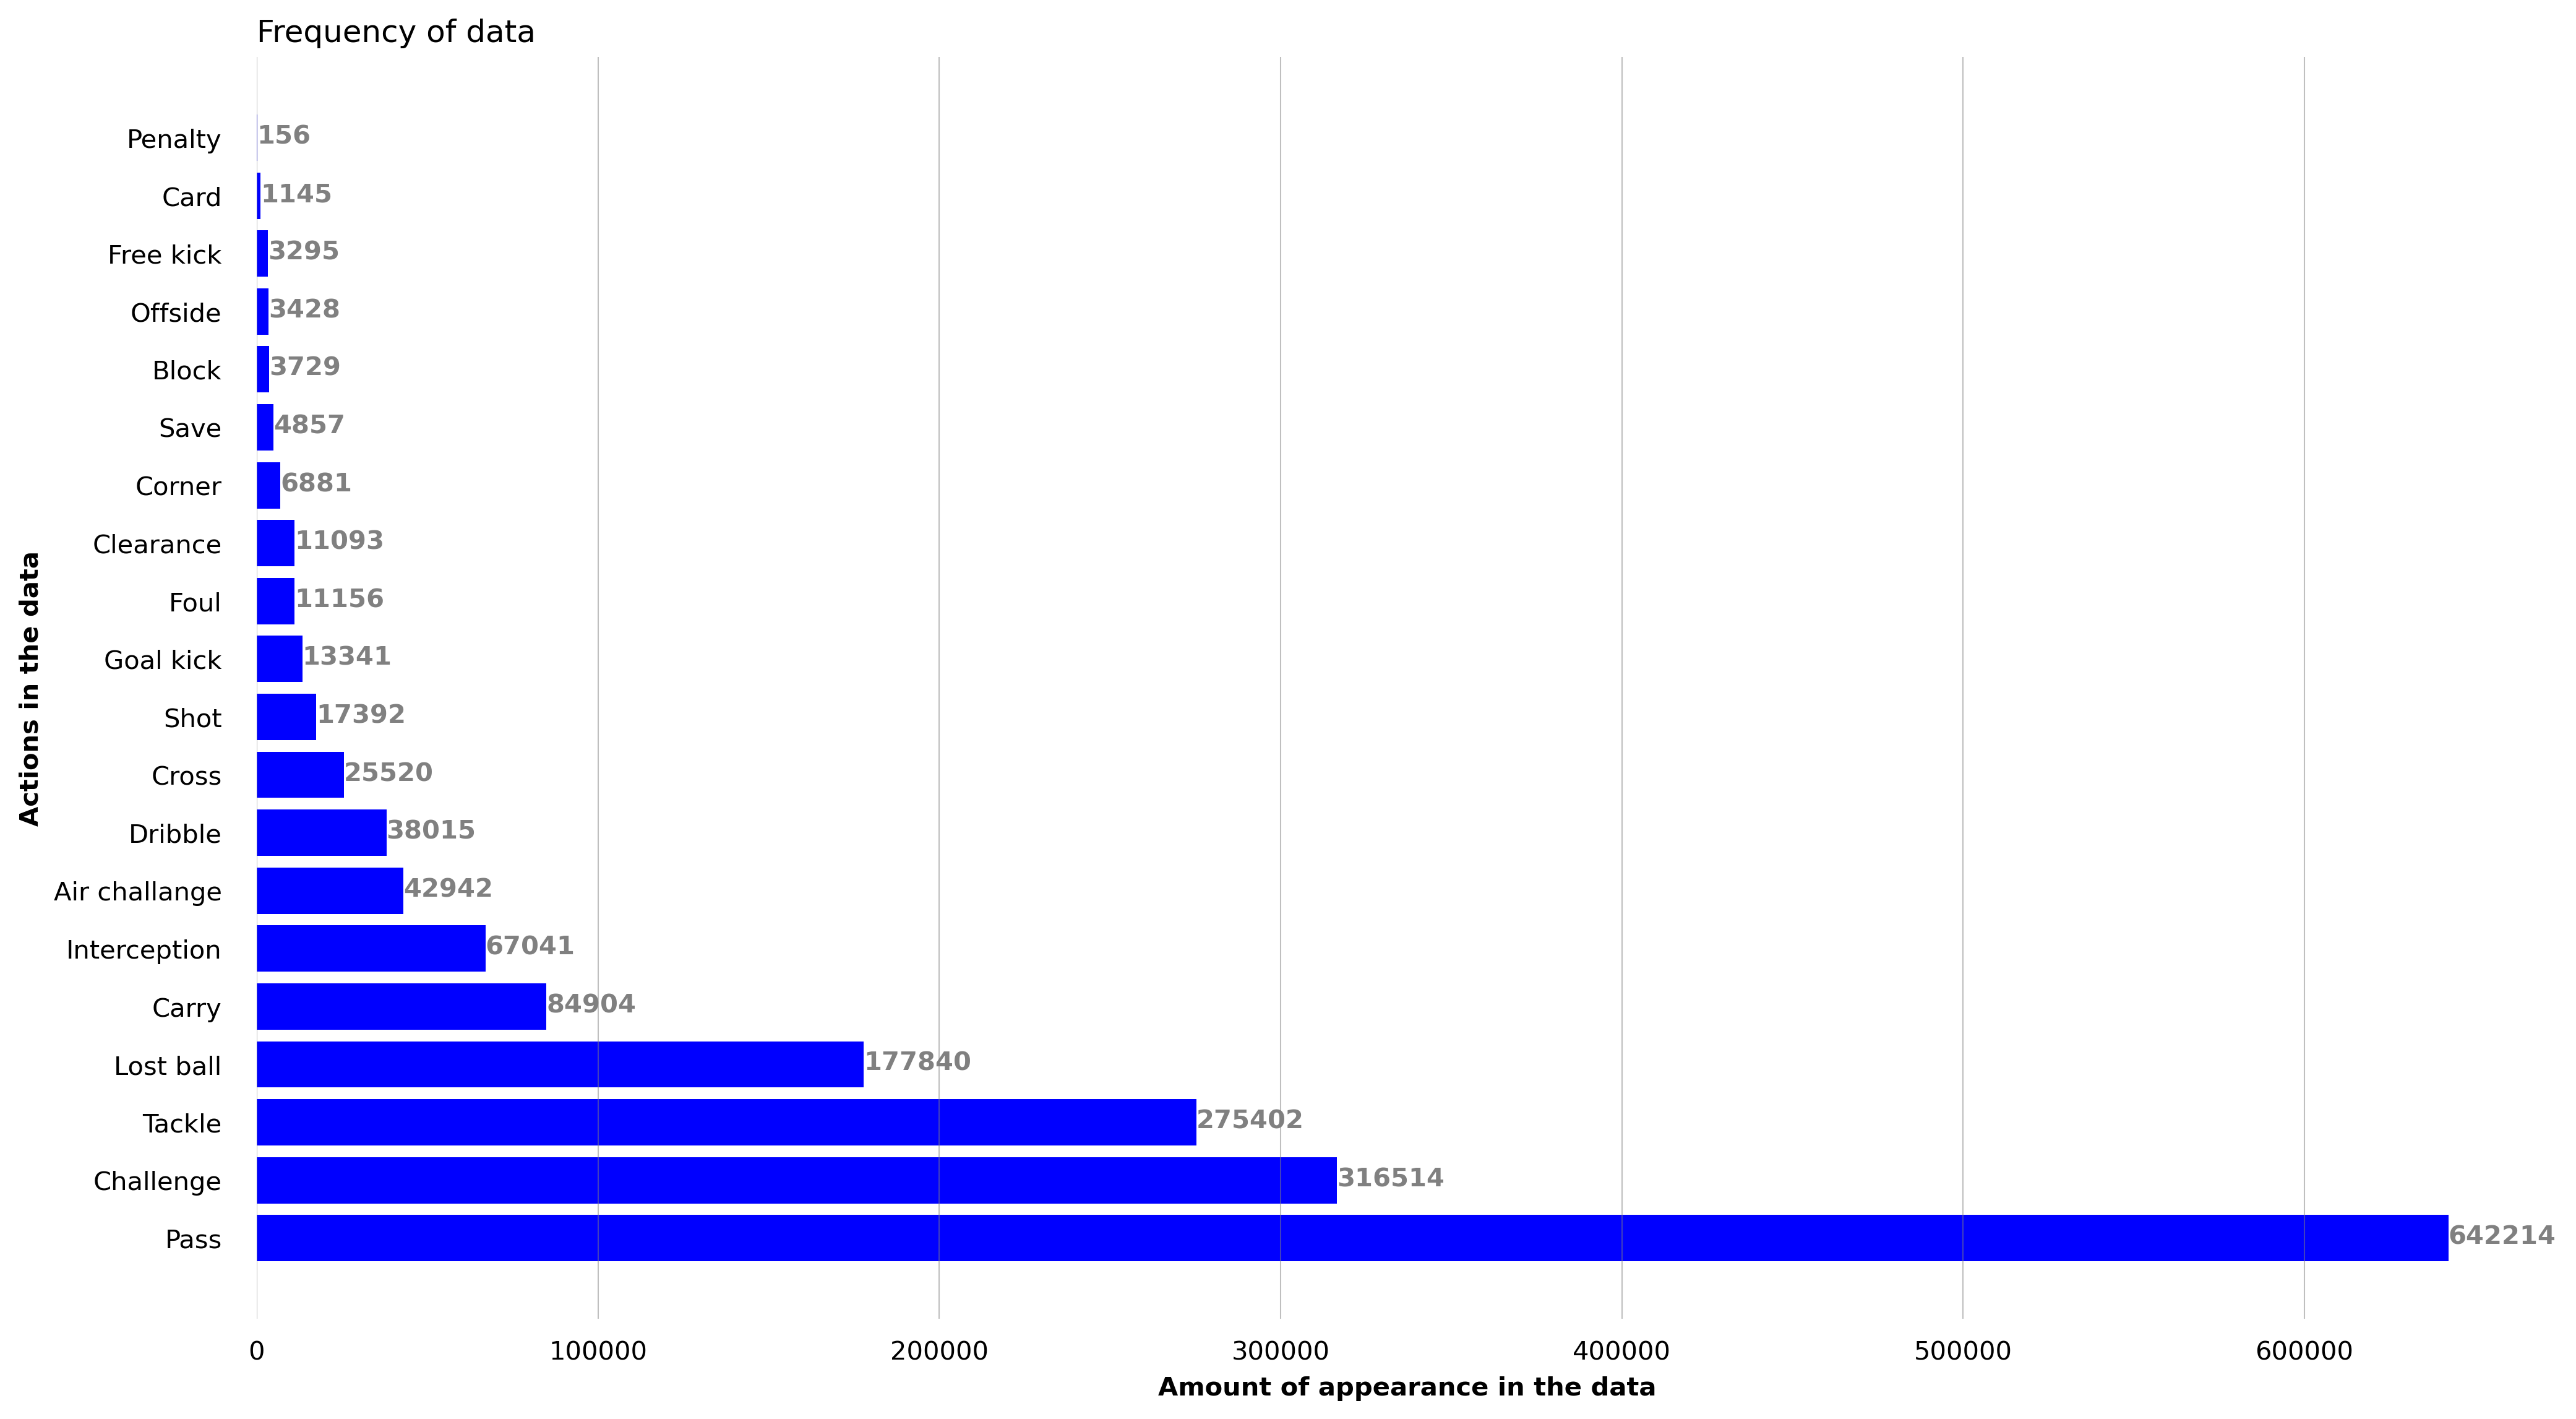

In [31]:

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

grouped_actions = {'Pass': actions['Pass accurate'] + actions['Pass inaccurate'], 'Carry' : actions['Carry'] , 'Lost ball' : actions['Lost ball'] , 'Challenge' : actions['Challenge successful'] + actions['Challenge unsuccessful'], 'Tackle': actions['Tackle unsuccessful'] + actions['Tackle successful'], 'Interception' : actions['Interception unsuccessful'] + actions['Interception successful'] , 'Dribble': actions['Dribble successful'] + actions['Dribble unsuccessful'],'Cross': actions['Cross inaccurate'] + actions['Cross accurate'], 'Foul': actions['Foul'], 'Shot': actions['Shot'], 'Block': actions['Block successful'] + actions['Block unsuccessful'], 'Corner': actions['Left corner accurate'] + actions['Left corner inaccurate'] + actions['Right corner inaccurate'] + actions['Right corner accurate'], 'Air challange': actions['Air challenge successful'] + actions['Air challenge unsuccessful'], 'Goal kick': actions['Goal kicks (Successful actions)'] + actions['Goal kicks (Unsuccessful actions)'], 'Save': actions['Save'], 'Clearance': actions['Clearance inaccurate'] + actions['Clearance accurate'] , 'Offside': actions['Offside'], 'Free kick': actions['Direct free kick accurate'] + actions['Direct free kick inaccurate'] + actions['Direct free kick shot inaccurate'] + actions['Direct free kick shot accurate'], 'Card': actions['Yellow card'] + actions['Red card'], 'Penalty' : actions['Penalty']}
fig, ax = plt.subplots(figsize =(16, 9))
sorted_actions = dict(sorted(grouped_actions.items(), key=lambda x:x[1]))
ax.barh(list(sorted_actions.keys()), list(sorted_actions.values()), color= 'b')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
 
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, axis='x' ,color ='grey', linewidth = 0.5,
        alpha = 0.5)
 
# Show top values 
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
 
# Add Plot Title
ax.set_title('Frequency of data',
             loc ='left', )
 
# Show Plot
plt.xlabel('Amount of appearance in the data', fontweight= 'bold')
plt.ylabel('Actions in the data', fontweight= 'bold')
plt.show()

## In percentages of actions

/var/folders/cn/b4r618q142sb6srpvcxf2jlw0000gn/T/ipykernel_10899/538542390.py:24: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b = True, axis='x' ,color ='grey', linewidth = 0.5,


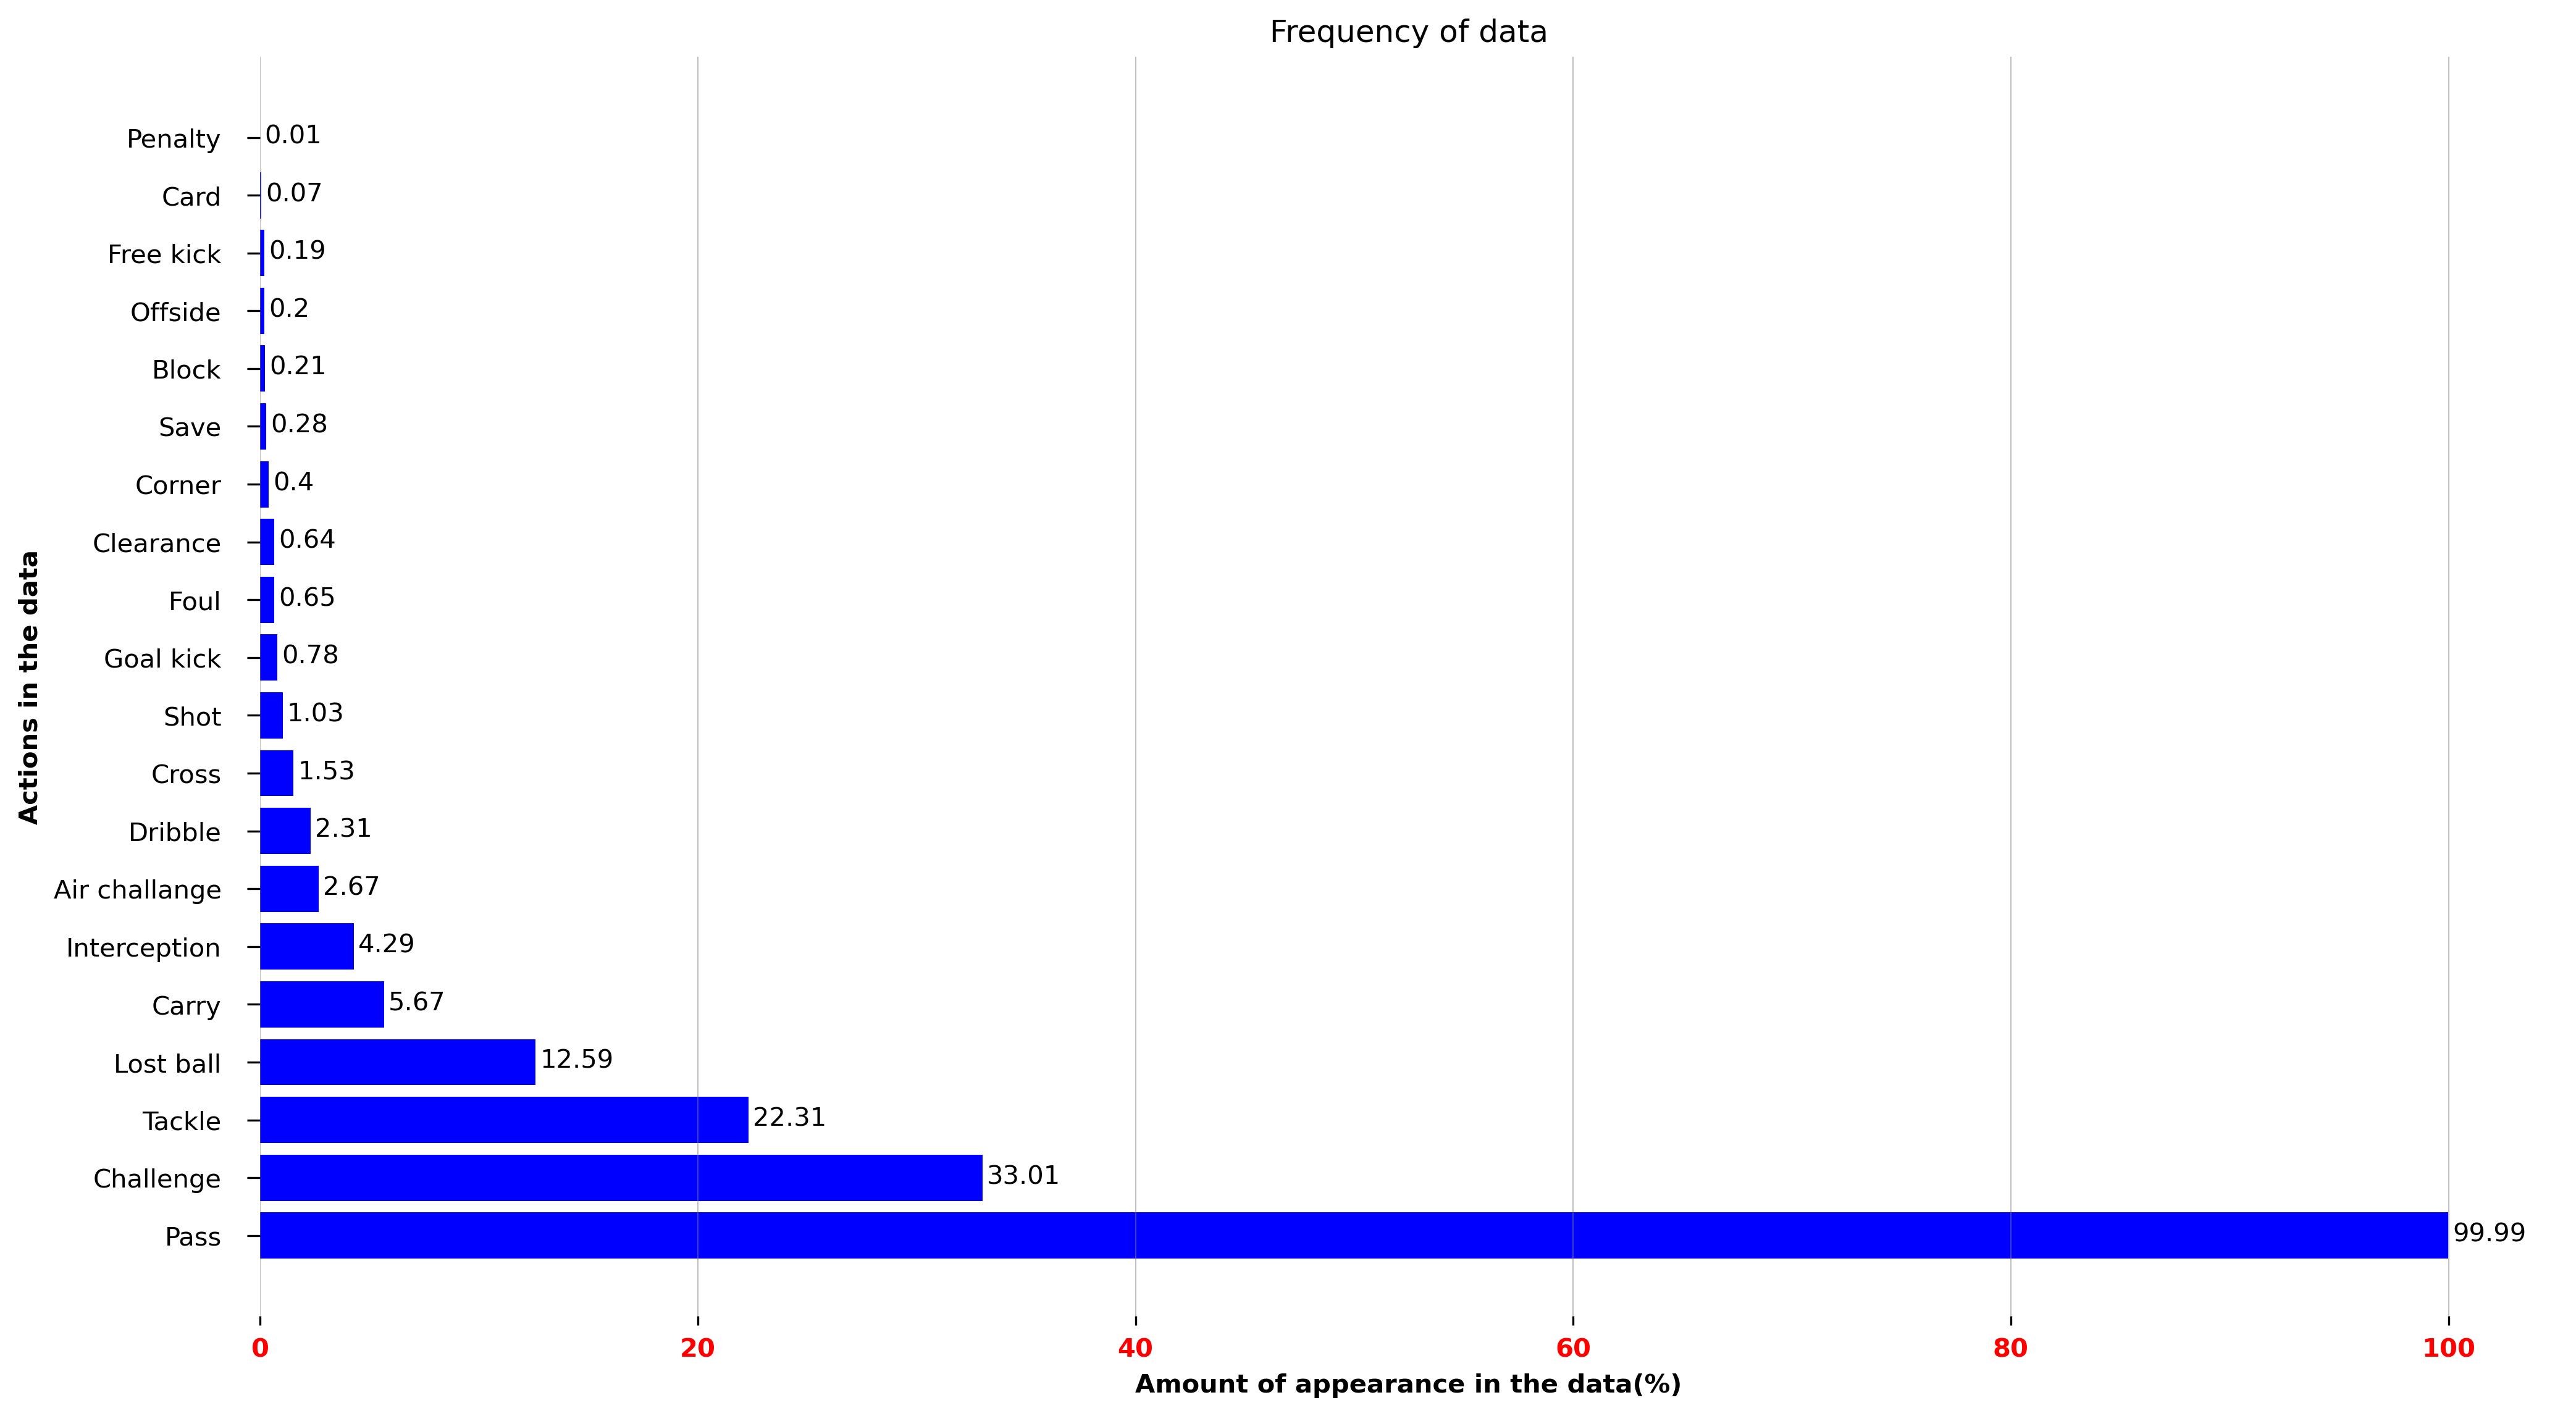

In [70]:
import matplotlib.ticker as mtick

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

grouped_actions = {'Pass': actions['Pass accurate'] + actions['Pass inaccurate'], 'Carry' : actions['Carry'] , 'Lost ball' : actions['Lost ball'] , 'Challenge' : actions['Challenge successful'] + actions['Challenge unsuccessful'], 'Tackle': actions['Tackle unsuccessful'] + actions['Tackle successful'], 'Interception' : actions['Interception unsuccessful'] + actions['Interception successful'] , 'Dribble': actions['Dribble successful'] + actions['Dribble unsuccessful'],'Cross': actions['Cross inaccurate'] + actions['Cross accurate'], 'Foul': actions['Foul'], 'Shot': actions['Shot'], 'Block': actions['Block successful'] + actions['Block unsuccessful'], 'Corner': actions['Left corner accurate'] + actions['Left corner inaccurate'] + actions['Right corner inaccurate'] + actions['Right corner accurate'], 'Air challange': actions['Air challenge successful'] + actions['Air challenge unsuccessful'], 'Goal kick': actions['Goal kicks (Successful actions)'] + actions['Goal kicks (Unsuccessful actions)'], 'Save': actions['Save'], 'Clearance': actions['Clearance inaccurate'] + actions['Clearance accurate'] , 'Offside': actions['Offside'], 'Free kick': actions['Direct free kick accurate'] + actions['Direct free kick inaccurate'] + actions['Direct free kick shot inaccurate'] + actions['Direct free kick shot accurate'], 'Card': actions['Yellow card'] + actions['Red card'], 'Penalty' : actions['Penalty']}
fig, ax = plt.subplots(figsize =(16, 9))
sorted_actions = dict(sorted(grouped_actions.items(), key=lambda x:x[1]))

for key , value in sorted_actions.items():
    sorted_actions[key] =  value/sum(sorted_actions.values()) * 100
ax.barh(list(sorted_actions.keys()), list(sorted_actions.values()), color= 'b')
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
#for container in ax.containers:
    #ax.bar_label(container, label_type='edge', padding=40) 
    #ax.yaxis.set_major_formatter(mtick.PercentFormatter())    
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, axis='x' ,color ='grey', linewidth = 0.5,
        alpha = 0.5)
 
# Show top values 
ax.invert_yaxis()
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5, 
             str(round((i.get_width()), 2)),
             fontsize = 10,
             color ='black')

ticklabels = [t for t in plt.gca().get_xticklabels()]

#WTF
for t in range (len(ticklabels)):
    ticklabels[t].set_fontweight('bold')
    ticklabels[t].set_color('red')

# Add Plot Title
ax.set_title('Frequency of data' )
ax.yaxis.set_tick_params(size=5)
# Show Plot
plt.xlabel('Amount of appearance in the data(%)', fontweight= 'bold')
plt.ylabel('Actions in the data', fontweight= 'bold')
plt.show()

## Blåvitt - MFF 2022

35


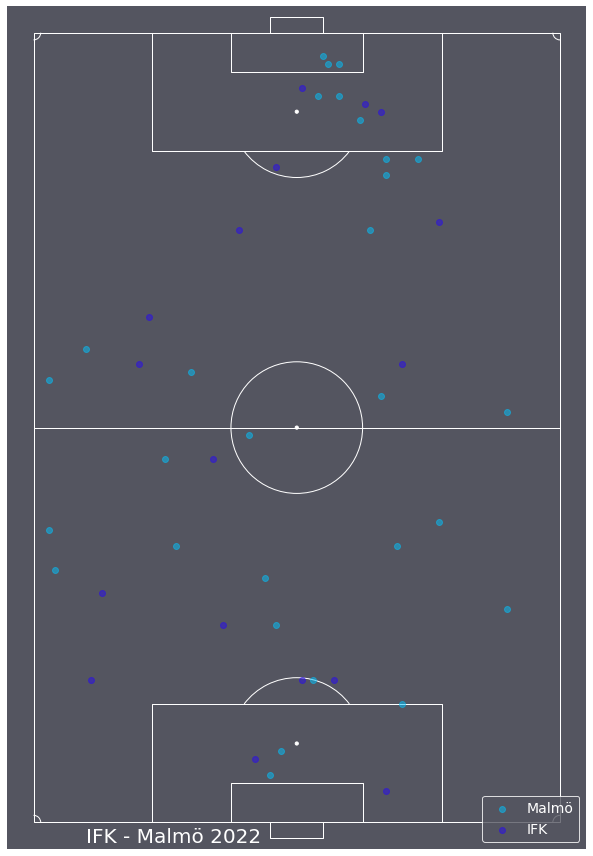

In [15]:
import json
from mplsoccer import VerticalPitch, Pitch
events = []
with open('event_data/Allsvenskan_2022/wyId_5321609-IFKGöteborg-MalmöFF.json') as file:        
    data = json.load(file)
                # Append the data to the list
    events.append(data['events'])
events = pd.concat([pd.DataFrame(x) for x in events])

x_header_coordinates_malmö = []
y_header_coordinates_malmö = []
x_header_coordinates_ifk = []
y_header_coordinates_ifk = []

for index, row in events.iterrows():
    if (row["action"] == "Air challenge successful") and row["team"] == "Malm\u00f6 FF":
        x_header_coordinates_malmö.append(row["xpos"])
        y_header_coordinates_malmö.append(row["ypos"])
    if (row["action"] == "Air challenge successful" ) and row["team"] == "IFK G\u00f6teborg":
        x_header_coordinates_ifk.append(row["xpos"])
        y_header_coordinates_ifk.append(row["ypos"])

mylist = list(dict.fromkeys(x_header_coordinates_ifk + x_header_coordinates_malmö))
print(len(mylist))
# Scale the x coheadernatesmalmöx_header_coordinates_malmö
x_header_coordinates_malmö = [x * 120 / 100 for x in x_header_coordinates_malmö]

# Scale the y coordinates
y_header_coordinates_malmö = [y * 80 / 100 for y in y_header_coordinates_malmö]

# Scale the x coheadernatesmalmöx_header_coordinates_malmö
x_header_coordinates_ifk = [x * 120 / 100 for x in x_header_coordinates_ifk]

# Scale the y coordinates
y_header_coordinates_ifk = [y * 80 / 100 for y in y_header_coordinates_ifk]

pitch = VerticalPitch(half=False, goal_type='box', corner_arcs=True, pitch_color='#545560', line_color='white', linewidth=1)

fig, ax = pitch.draw(figsize=(12,12))

sc = pitch.scatter(x_header_coordinates_malmö, y_header_coordinates_malmö, 
                   ax=ax, color='#03c2fc', alpha=0.5, label='Malmö')

sc = pitch.scatter(x_header_coordinates_ifk, y_header_coordinates_ifk, 
                   ax=ax, color='#280af0', alpha=0.5, label='IFK')


# Create a legend and set the facecolor, edgecolor, and fontsize
legend = ax.legend(loc='lower right', facecolor='#545560', edgecolor='white', fontsize=14)

# Set the color of the legend text to white
for text in legend.get_texts():
    text.set_color('white')

txt = ax.text(x=8, y=-3, s='IFK - Malmö 2022', fontsize=20, color='white')
